C:\Users\spark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\spark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

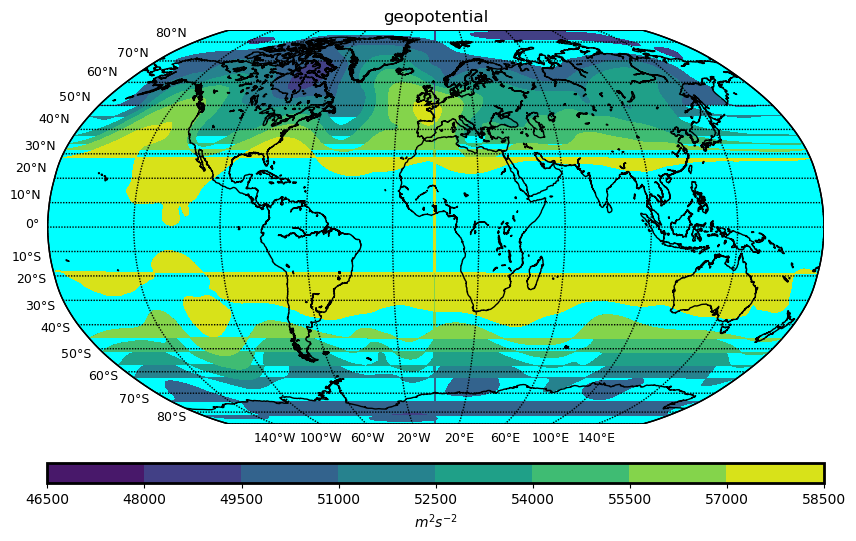

In [48]:
from numpy import *
import numpy as np
#matplotlib.use('TKAgg')
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr
import matplotlib.patches as mpatches
%matplotlib inline

data = xr.open_dataset('eraint_2019010100.nc')
lons=data.variables['longitude'][:]
lats=data.variables['latitude'][:] # to plot northern hemisphere replace [0:90]
data['wind_speed'] = (data['u']**2 + data['v']**2)**(1/2)
data['wind_dir']=np.mod(180+np.rad2deg(np.arctan2(data['u'], data['v'])),360)
u=data.variables['u'][0,:]
v=data.variables['v'][0,:]
v0=data.variables['vo'][0,:]
z=data.variables['z'][0,:]
wind_speed=data.variables['wind_speed'][0,:]
wind_dir=data.variables['wind_dir'][0,:]
a=plt.figure(figsize=(12,6),dpi=100)
#plt.rcParams['axes.linewidth'] = 2 #set the value globally
m = Basemap(projection='robin',lon_0 = 0,resolution='l')
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
cs = m.contourf(xi,yi,np.squeeze(z[:,:])) # to plot northern hemisphere replace [0:90,:]
m.drawcoastlines()
m.drawparallels(np.arange(-90, 90, 10), labels=[1,0,0,0], fontsize=9)
m.drawmeridians(np.arange(-180, 181, 40), labels=[0,0,0,1], fontsize=9)
m.drawmapboundary(fill_color='aqua')
cbar = m.colorbar(cs, location='bottom', pad="10%")
#cbar.set_label('$ms^{-1}$')
#cbar.set_label('degree [°]')
cbar.set_label('$m^2s^{-2}$')
#cbar.set_label('$s{-1}$')
plt.title('geopotential')
plt.show()
a.savefig('geopotential.png')

In [49]:
import netCDF4
filename='eraint_2019010100.nc'
nc = netCDF4.Dataset(filename, 'r')
for i in nc.variables:
    print(i, nc.variables[i].units, nc.variables[i].shape)

longitude degrees_east (360,)
latitude degrees_north (181,)
time hours since 1900-01-01 00:00:00.0 (1,)
z m**2 s**-2 (1, 181, 360)
vo s**-1 (1, 181, 360)
u m s**-1 (1, 181, 360)
v m s**-1 (1, 181, 360)


C:\Users\spark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


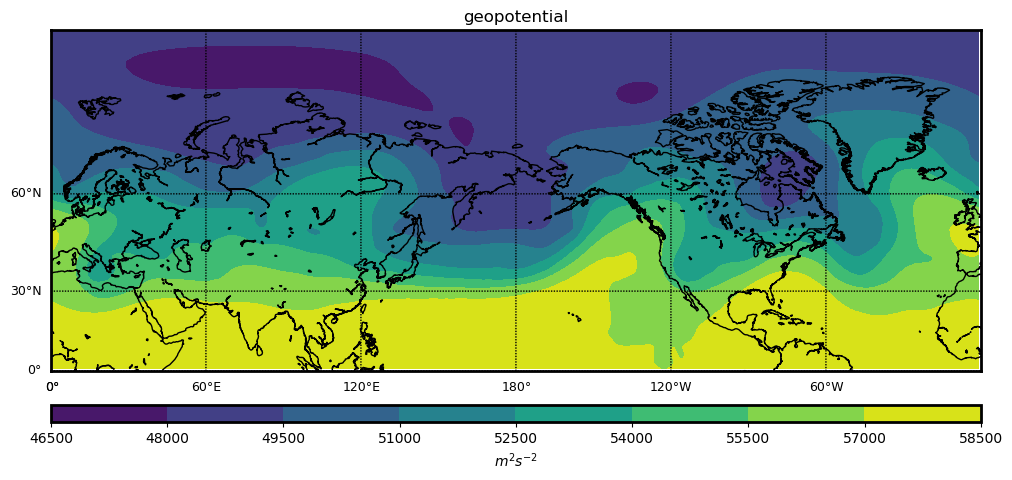

In [120]:
from numpy import *
import numpy as np
#matplotlib.use('TKAgg')
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr
import matplotlib.patches as mpatches
%matplotlib inline

data = xr.open_dataset('eraint_2019010100.nc')
lons=data.variables['longitude'][:]
lats=data.variables['latitude'][0:90] # to plot northern hemisphere replace [0:90]
data['wind_speed'] = (data['u']**2 + data['v']**2)**(1/2)
data['wind_dir']=np.mod(180+np.rad2deg(np.arctan2(data['u'], data['v'])),360)
u=data.variables['u'][0,:]
v=data.variables['v'][0,:]
v0=data.variables['vo'][0,:]
z=data.variables['z'][0,:]
wind_speed=data.variables['wind_speed'][0,:]
wind_dir=data.variables['wind_dir'][0,:]
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
a=plt.figure(figsize=(12,6),dpi=100)
m = Basemap(projection='mill',llcrnrlat=0,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='l')
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
cs=m.contourf(xi,yi,np.squeeze(z[0:90,:])) # to plot northern hemisphere replace [0:90,:]
m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(0, 90, 30), labels=[1,0,0,0], fontsize=9)
m.drawmeridians(np.arange(-180, 181, 60), labels=[0,0,0,1], fontsize=9)
cbar = m.colorbar(cs, location='bottom', pad="10%")
#cbar.set_label('$ms^{-1}$')
#cbar.set_label('degree [°]')
cbar.set_label('$m^2s^{-2}$')
#cbar.set_label('$s{-1}$')
plt.title('geopotential')
plt.show()
#a.savefig('geopotential NH.png')
#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))

In [53]:
from scipy import integrate 
data = xr.open_dataset('eraint_2019010100.nc')
v0=data.variables['vo'][0,:]
def f(x):
    return x**2

integrate.quad(f,-90,90)

(486000.0, 5.395683899678261e-09)

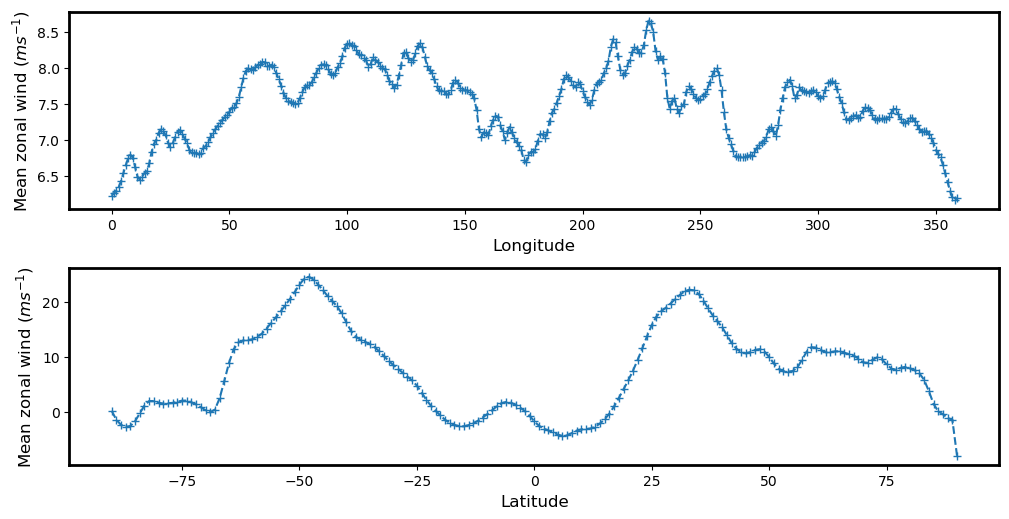

In [42]:
#Mean zonal wind 
a=plt.figure(figsize=(12,6),dpi=100)
plt.subplot(211)
plt.plot(lons,u.mean(axis=0),'+--')
plt.xlabel('Longitude',fontsize=12)
plt.ylabel('Mean zonal wind ($ms^{-1}$)',fontsize=12)
plt.subplot(212)
plt.plot(lats,u.mean(axis=1),'+--')
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Mean zonal wind ($ms^{-1}$)',fontsize=12)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
plt.show()
a.savefig('Mean zonal wind.png')

In [50]:
v0=data.variables['vo'][0,:]

In [51]:
v0

<xarray.Variable (latitude: 181, longitude: 360)>
array([[-2.826329e-05, -2.826329e-05, -2.826329e-05, ..., -2.826329e-05,
        -2.826329e-05, -2.826329e-05],
       [-3.845815e-05, -3.824877e-05, -3.800719e-05, ..., -3.879637e-05,
        -3.872389e-05, -3.860310e-05],
       [-3.737102e-05, -3.687980e-05, -3.623557e-05, ..., -3.802330e-05,
        -3.793471e-05, -3.772534e-05],
       ...,
       [-4.853784e-06, -4.926260e-06, -5.006790e-06, ..., -4.612200e-06,
        -4.708836e-06, -4.781308e-06],
       [ 1.077671e-05,  1.072035e-05,  1.067203e-05, ...,  1.100219e-05,
         1.092972e-05,  1.084919e-05],
       [ 3.309910e-05,  3.309910e-05,  3.309910e-05, ...,  3.309910e-05,
         3.309910e-05,  3.309910e-05]], dtype=float32)
Attributes:
    units:          s**-1
    long_name:      Vorticity (relative)
    standard_name:  atmosphere_relative_vorticity

C:\Users\spark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\spark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

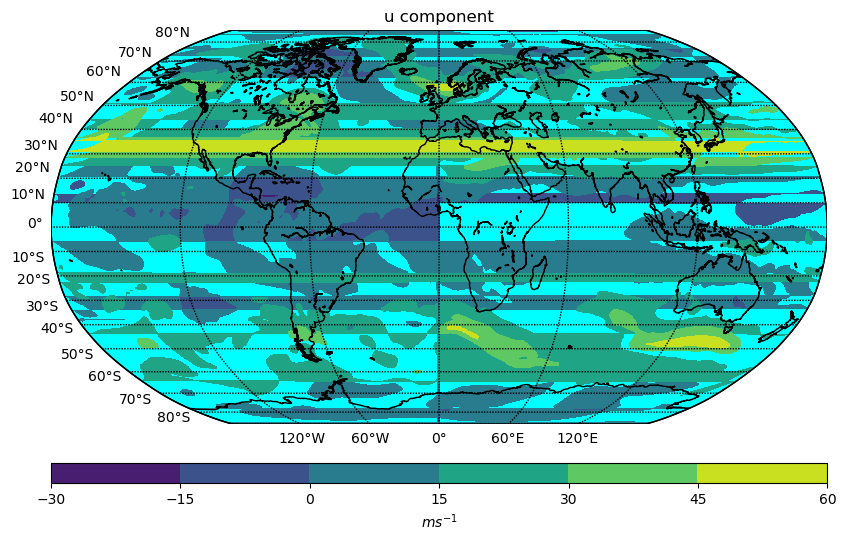

In [8]:
from numpy import *
import numpy as np
#matplotlib.use('TKAgg')
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr
import matplotlib.patches as mpatches
%matplotlib inline
data = xr.open_dataset('eraint_2019010100.nc')
lons=data.variables['longitude'][:]
lats=data.variables['latitude'][:] # to plot northern hemisphere replace [0:90]
data['wind_speed'] = (data['u']**2 + data['v']**2)**(1/2)
data['wind_dir']=np.mod(180+np.rad2deg(np.arctan2(data['u'], data['v'])),360)
u=data.variables['u'][0,:]
v=data.variables['v'][0,:]
wind_speed=data.variables['wind_speed'][0,:]
wind_dir=data.variables['wind_dir'][0,:]
plt.figure(figsize=(12,6),dpi=100)
m = Basemap(projection='robin',lon_0 = 0,resolution='l')
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
cs = m.contourf(xi,yi,np.squeeze(u[:,:])) # to plot northern hemisphere replace [0:90,:]
m.drawcoastlines()
m.drawparallels(np.arange(-90, 90, 10), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180, 181, 60), labels=[0,0,0,1], fontsize=10)
m.drawmapboundary(fill_color='aqua')
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('$ms^{-1}$')
#cbar.set_label('degree')
#cbar.set_label('$m^2s{-2}$')
#cbar.set_label('$s{-1}$')
plt.title('u component')
plt.show()
    


In [52]:
from osgeo import gdal

ModuleNotFoundError: No module named 'osgeo'